In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('AirPassengers.csv', date_format='%Y-%m', names=['Date', 'Pass'], index_col=0, header=0)
df.head()

,Pass
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [50]:
df.loc['1951-01-01':'1951-05-01'] = np.nan

In [51]:
data = pd.read_csv('AirPassengers.csv', date_format='%Y-%m', names=['Date', 'Pass'], index_col=0, header=0)

In [52]:
df['nearest'] = df['Pass'].interpolate(method='nearest')

In [53]:
df['Interpolate'] = df['Pass'].interpolate(method='linear')

In [54]:
df['time'] = df['Pass'].interpolate(method='time')

In [55]:
df['polyniminal'] = df['Pass'].interpolate(method='polynomial', order=2)

In [56]:
df['filled'] = df['Pass'].fillna(df['Pass'].rolling(window=6, min_periods=1, center=True).mean())

In [57]:
data = pd.read_csv('AirPassengers.csv', names=['Date', 'Pass'], date_format='%Y-%m', index_col=0, header=0)

original = data.loc['1951-01-01':'1951-05-01']

In [58]:
result = pd.DataFrame({'original data': data['Pass'], 'Interpolate': df['Interpolate'],
                      'Interpolate time': df['time'], 'polynomial': df['polyniminal'], 
                      'nearest': df['nearest'], 'filled': df['filled']})

result.loc['1951-01-01':'1951-05-01']

,original data,Interpolate,Interpolate time,polynomial,nearest,filled
Date,,,,,,
1951-01-01,145,146.333333,146.472527,162.354584,140.0,129.0
1951-02-01,150,152.666667,152.945055,170.468595,140.0,127.0
1951-03-01,178,159.000000,158.791209,165.557302,140.0,140.0
1951-04-01,163,165.333333,165.263736,158.564434,178.0,178.0
1951-05-01,172,171.666667,171.527473,162.617489,178.0,188.5


In [49]:
result['filled'].loc['1951-01-01':'1951-05-01']

Date
1951-01-01    129.0
1951-02-01    127.0
1951-03-01    140.0
1951-04-01    178.0
1951-05-01    188.5
Name: filled, dtype: float64

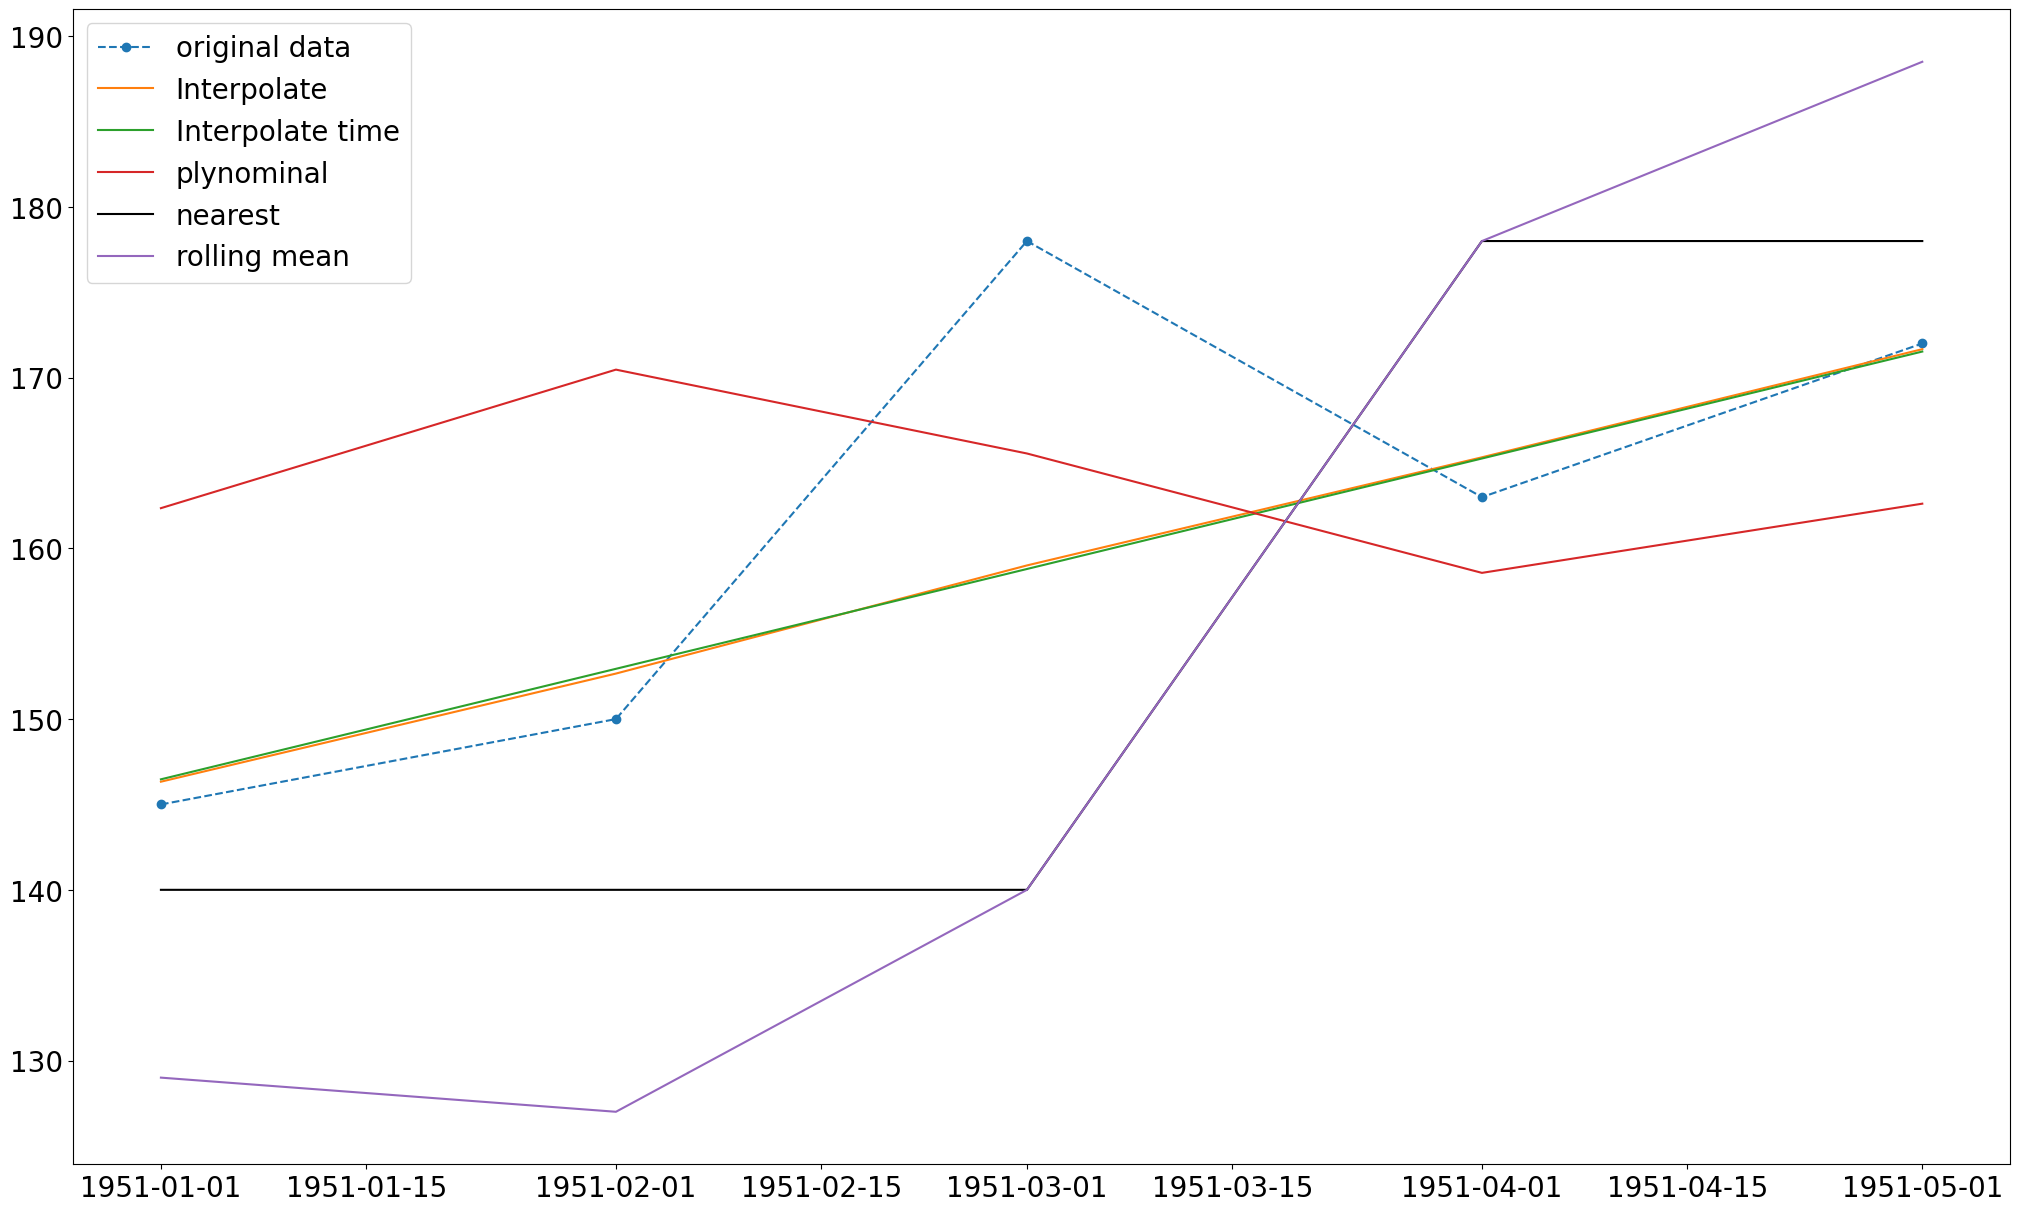

In [50]:
plt.figure(figsize=(25, 15))
plt.rcParams.update({'font.size': 20})
plt.plot(data['Pass'].loc['1951-01-01':'1951-05-01'], label='original data', marker='o', linestyle='--')
plt.plot(result['Interpolate'].loc['1951-01-01':'1951-05-01'], label='Interpolate')
plt.plot(result['Interpolate time'].loc['1951-01-01':'1951-05-01'], label='Interpolate time')
plt.plot(result['polynomial'].loc['1951-01-01':'1951-05-01'], label='plynominal')
plt.plot(result['nearest'].loc['1951-01-01':'1951-05-01'], label='nearest', c='black')
plt.plot(result['filled'].loc['1951-01-01':'1951-05-01'], label='rolling mean')
plt.legend()
plt.show()

In [110]:
from sklearn.metrics import mean_absolute_error

DATA = result.loc['1951-01-01':'1951-05-01']
original = DATA.iloc[::, 0]
train_data = DATA.iloc[::, 1:]
names = train_data.columns


for i in range(len(names)):
    col = train_data.iloc[::, i]
    print(f"MSE: | Original with method -> {names[i]} | error-> {mean_absolute_error(original, col):.3f}")

MSE: | Original with method -> Interpolate | error-> 5.133
MSE: | Original with method -> Interpolate time | error-> 5.273
MSE: | Original with method -> polynomial | error-> 12.817
MSE: | Original with method -> nearest | error-> 14.800
MSE: | Original with method -> filled | error-> 21.700


In [156]:
# first_value = DATA.loc['1951-01-01':'1951-05-01', DATA.columns[0]]

# first_value

Date
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
Name: original data, dtype: int64

---------------

In [162]:
missing = df['Pass'][df['Pass'].isna()]
know = df['Pass'].dropna()

In [174]:
x_train = np.array(know.index.to_julian_date()).reshape(-1, 1)
y_train = know.values

x_pred = np.array(missing.index.to_julian_date()).reshape(-1, 1)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [176]:
predict = model.predict(x_pred)

predict.reshape(-1, 1)

array([[153.96257588],
       [156.670724  ],
       [159.11679327],
       [161.82494139],
       [164.44572989]])

In [177]:
df.loc['1951-01-01':'1951-05-01']['Pass']

Date
1951-01-01   NaN
1951-02-01   NaN
1951-03-01   NaN
1951-04-01   NaN
1951-05-01   NaN
Name: Pass, dtype: float64

In [178]:
data.loc['1951-01-01':'1951-05-01']['Pass']

Date
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
Name: Pass, dtype: int64

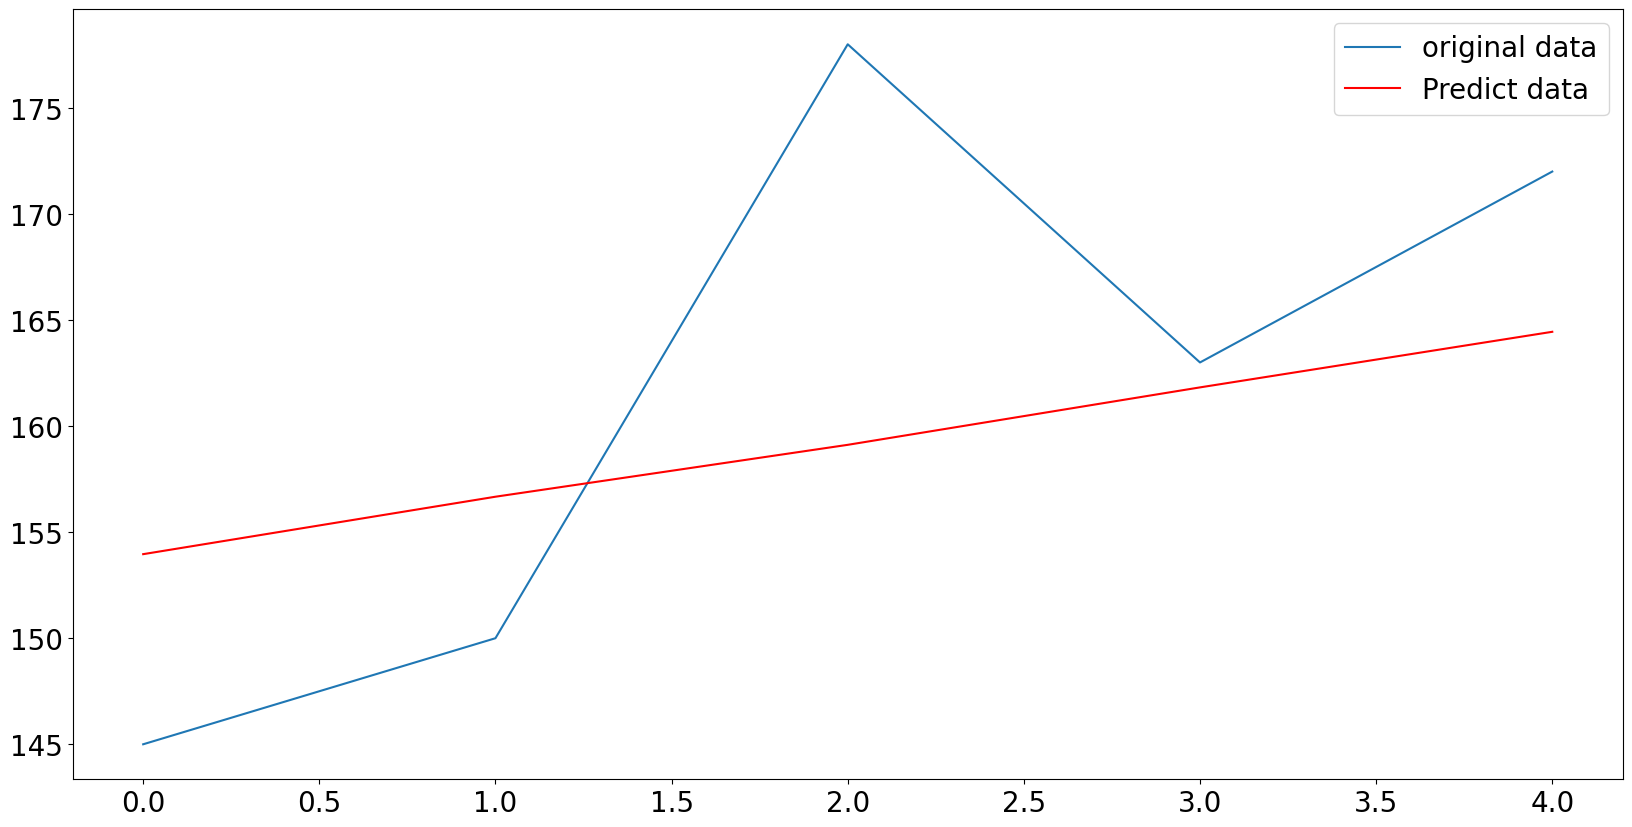

In [179]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20, 10))
plt.plot(data.loc['1951-01-01':'1951-05-01']['Pass'].values, label='original data')
plt.plot(predict, c='r', label='Predict data')
plt.legend()
plt.show()

---------------

In [180]:
data.loc['1951-01-01':'1951-06-01'] = np.nan

In [181]:
from scipy.interpolate import interp1d


known = data.dropna()
missing = data[data["Pass"].isna()]

X_train = known.index.to_julian_date()
y_train = known["Pass"]

X_pred = missing.index.to_julian_date()

In [182]:
quad_iterp = interp1d(X_train, y_train,  kind="quadratic", fill_value="extrapolate")

pred_data = quad_iterp(X_pred)

In [183]:
pred_data.reshape(-1, 1)

array([[166.77761306],
       [184.56472866],
       [192.90298612],
       [194.68788559],
       [195.65193675],
       [197.1208988 ]])

----------------------------

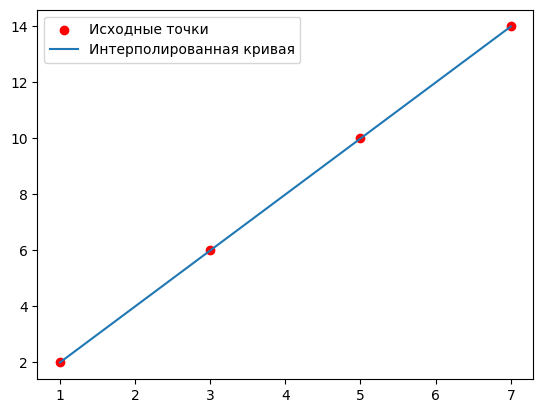

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x = np.array([1, 3, 5, 7])  # Известные точки
y = np.array([2, 6, 10, 14])  # Значения

interp = interp1d(x, y, kind="linear")  # Интерполяция
x_new = np.linspace(1, 7, 50)  # Новые точки внутри диапазона
y_new = interp(x_new)

plt.rcParams.update({'font.size':10})
plt.scatter(x, y, color='red', label='Исходные точки')
plt.plot(x_new, y_new, label='Интерполированная кривая')
plt.legend()
plt.show()


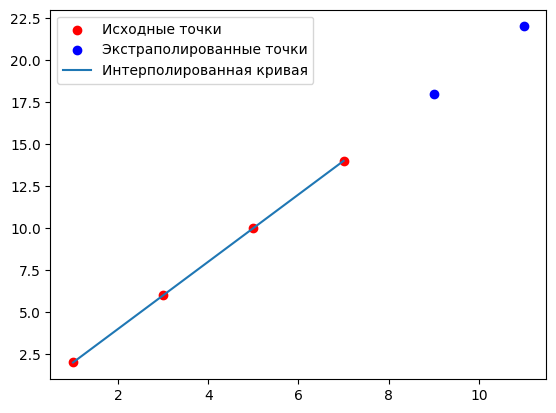

In [189]:
def linear_extrapolation(x, y, x_new):
    """Линейная экстраполяция по последним двум точкам"""
    slope = (y[-1] - y[-2]) / (x[-1] - x[-2])  # Наклон
    y_new = y[-1] + slope * (x_new - x[-1])  # Прогноз
    return y_new

x_extra = np.array([9, 11])  # Новые точки за пределами исходных данных
y_extra = linear_extrapolation(x, y, x_extra)

plt.scatter(x, y, color='red', label='Исходные точки')
plt.scatter(x_extra, y_extra, color='blue', label='Экстраполированные точки')
plt.plot(x_new, y_new, label='Интерполированная кривая')
plt.legend()
plt.show()


------------------

In [120]:
d = pd.read_csv('AirPassengers.csv', date_format='%Y-%m', names=['Date', 'Pass'], index_col=0, header=0)

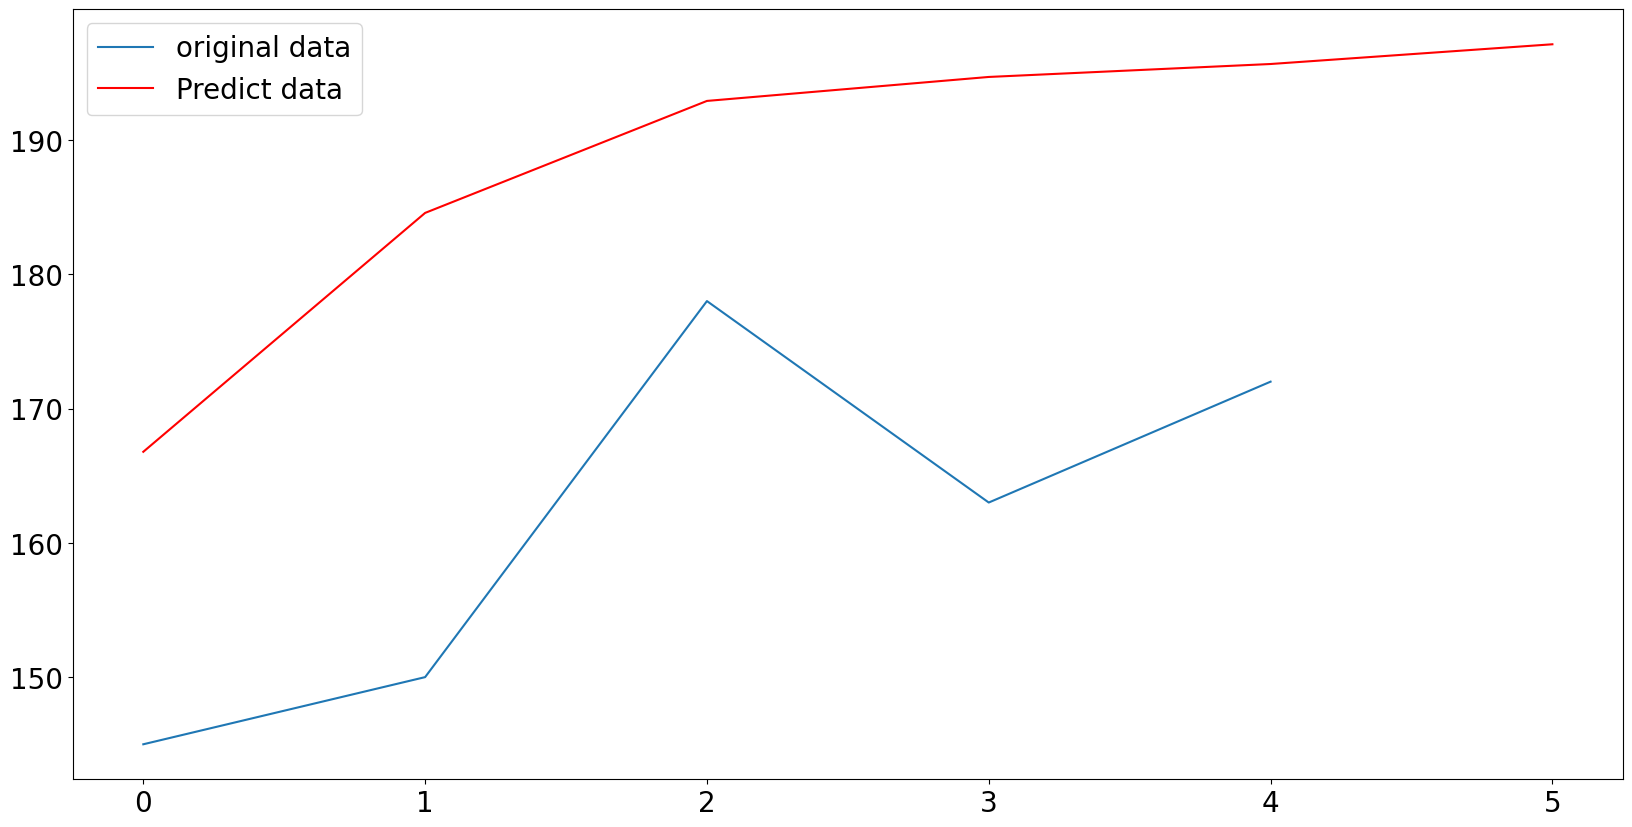

In [124]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20, 10))
plt.plot(d.loc['1951-01-01':'1951-05-01']['Pass'].values, label='original data')
plt.plot(pred_data.reshape(-1, 1), c='r', label='Predict data')
plt.legend()
plt.show()

In [131]:
e1 = d.loc['1951-01-01':'1951-06-01']['Pass'].values

e2 = pred_data

print(mean_absolute_error(e1, e2))

24.28434149643341


----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('AirPassengers.csv', names=['Date', 'Pass'], date_format='%Y-%m', index_col=0, header=0)

x = data.index
y = data['Pass']

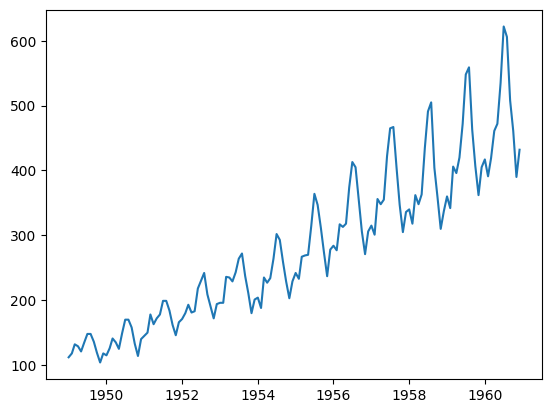

In [2]:
plt.plot(data)
plt.show()

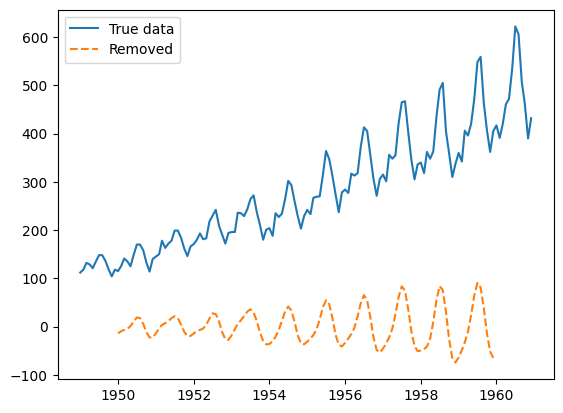

In [7]:
import statsmodels.api as sm


cycle = sm.tsa.filters.bkfilter(data['Pass'], low=6, high=32, K=12)

plt.plot(data, label='True data')
plt.plot(cycle, label='Removed', linestyle='--')
plt.legend()
plt.show()

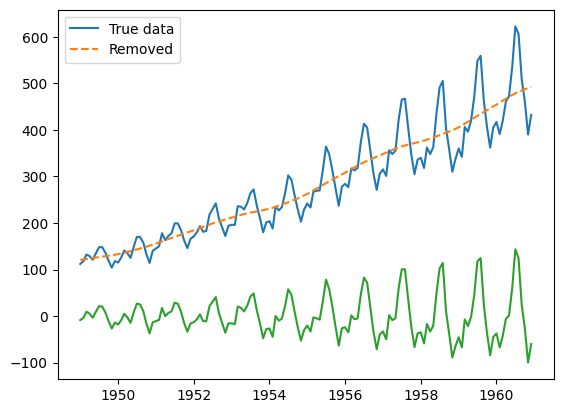

In [9]:
cycle, trend = sm.tsa.filters.hpfilter(data['Pass'], lamb=1600)

plt.plot(data, label='True data')
plt.plot(trend, label='Removed', linestyle='--')
plt.plot(cycle)
plt.legend()
plt.show()

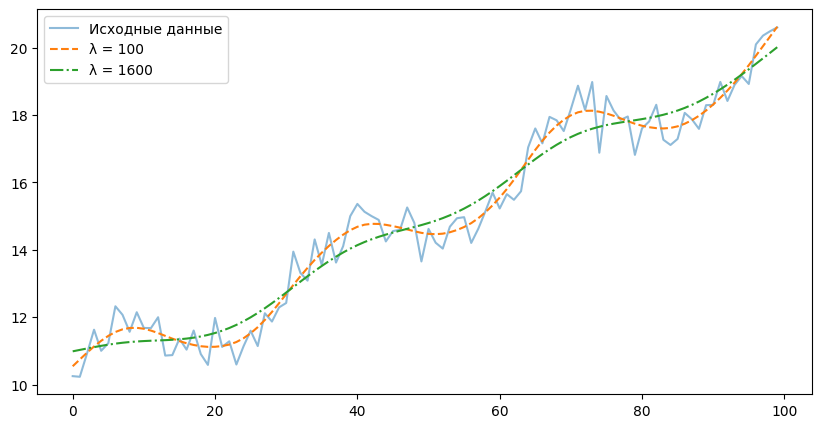

In [10]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
t = np.arange(100)
y = 10 + 0.1 * t + np.sin(0.2 * t) + np.random.normal(0, 0.5, len(t))

cycle1, trend1 = sm.tsa.filters.hpfilter(y, lamb=100)
cycle2, trend2 = sm.tsa.filters.hpfilter(y, lamb=1600)

plt.figure(figsize=(10, 5))
plt.plot(t, y, label="Исходные данные", alpha=0.5)
plt.plot(t, trend1, label="λ = 100", linestyle="--")
plt.plot(t, trend2, label="λ = 1600", linestyle="-.")
plt.legend()
plt.show()


------------

In [3]:
########### moving average

In [41]:
import pandas as pd
import numpy as np

data = {"x": [116.0, 128.0, 142.0, 145.0, 103.0, np.nan, np.nan, 146.0, 100.0, 129.0]}
df = pd.DataFrame(data)

# Вычисляем скользящее среднее с окном 3
rolling_mean = df.rolling(window=3, min_periods=1).mean()


# Заполняем NaN значениями из скользящего среднего
df.fillna(rolling_mean, inplace=True)

# Вывод результата
print(df)

       x
0  116.0
1  128.0
2  142.0
3  145.0
4  103.0
5  124.0
6  103.0
7  146.0
8  100.0
9  129.0


In [48]:
df.iloc[3:5]

,x
3,145.0
4,103.0


In [47]:
df.iloc[3:5].mean()

x    124.0
dtype: float64

--------------

C:\python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


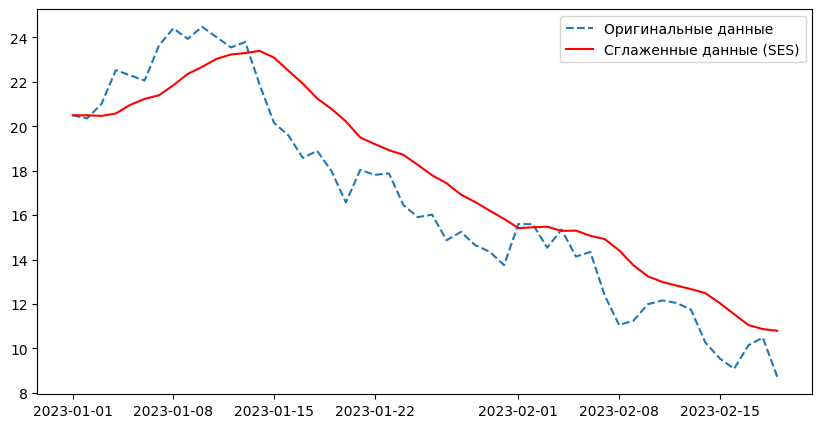

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Генерируем данные
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=50)
values = np.cumsum(np.random.randn(50)) + 20  # случайные данные с трендом
df = pd.DataFrame({"Date": dates, "Value": values}).set_index("Date")

# Применяем экспоненциальное сглаживание
alpha = 0.2  # коэффициент сглаживания
model = SimpleExpSmoothing(df["Value"])
fitted_model = model.fit(smoothing_level=alpha, optimized=False)
df["Smoothed"] = fitted_model.fittedvalues

# Строим график
plt.figure(figsize=(10,5))
plt.plot(df["Value"], label="Оригинальные данные", linestyle="dashed")
plt.plot(df["Smoothed"], label="Сглаженные данные (SES)", color="red")
plt.legend()
plt.show()


In [159]:
data = pd.DataFrame({'date': pd.date_range(start='2025-01-01', periods=10),
                     'X': np.array([100, 105, 111, 115.2, 123, 113, 109, 115, 125, 120.0])}).set_index('date')

In [160]:
value = data['X'].values

alpha = 0.3  # Коэффициент сглаживания

new = [value[0]]  # Начальное значение - первое наблюдение

for i in range(1, len(value)):
    smoothed_value = alpha * data['X'].iloc[i] + (1 - alpha) * new[-1]
    new.append(smoothed_value)

data['Smoothed'] = new  # Добавляем сглаженный ряд в DataFrame
print(data)


                X    Smoothed
date                         
2025-01-01  100.0  100.000000
2025-01-02  105.0  101.500000
2025-01-03  111.0  104.350000
2025-01-04  115.2  107.605000
2025-01-05  123.0  112.223500
2025-01-06  113.0  112.456450
2025-01-07  109.0  111.419515
2025-01-08  115.0  112.493660
2025-01-09  125.0  116.245562
2025-01-10  120.0  117.371894


In [166]:
for i in range(1, len(new)):
    print(value[i], new[-1])

105.0 117.37189364499997
111.0 117.37189364499997
115.2 117.37189364499997
123.0 117.37189364499997
113.0 117.37189364499997
109.0 117.37189364499997
115.0 117.37189364499997
125.0 117.37189364499997
120.0 117.37189364499997


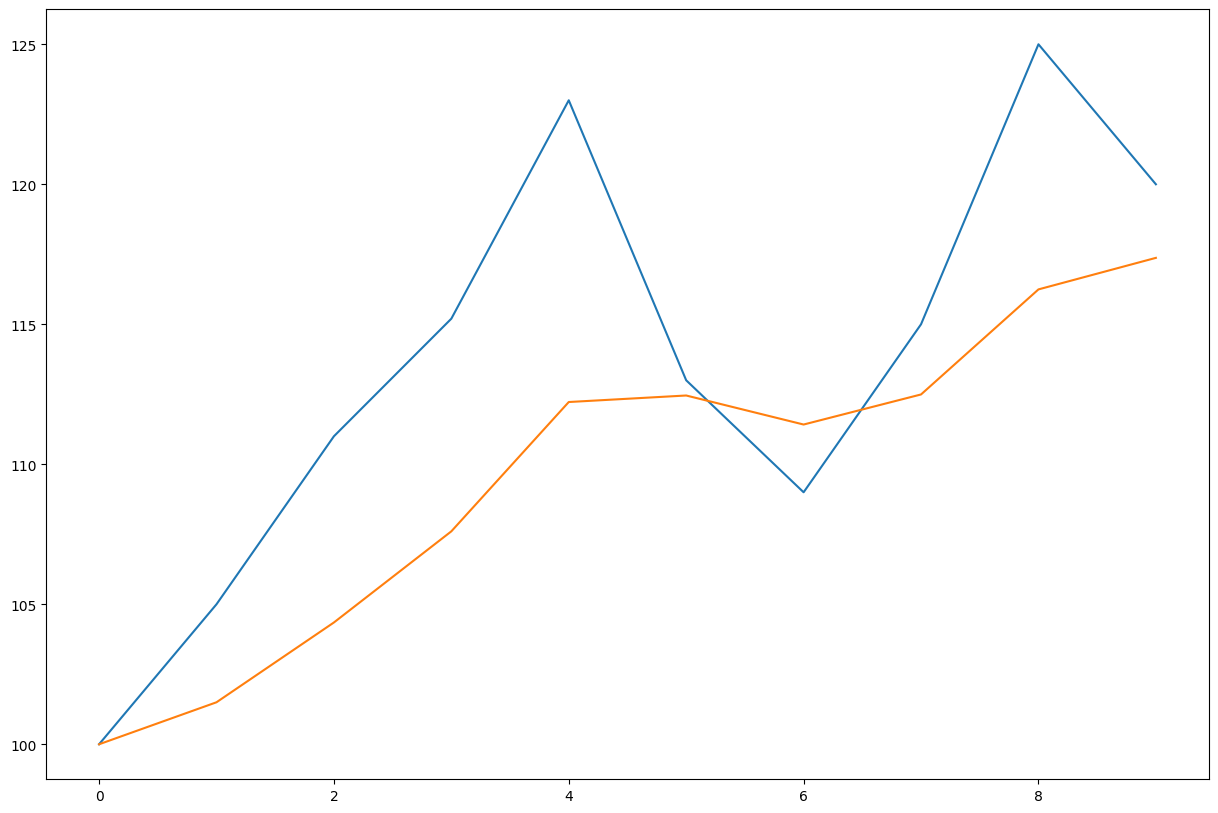

In [162]:
plt.figure(figsize=(15, 10))
plt.plot(data['X'].values)
plt.plot(data['Smoothed'].values)
plt.show()